In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import scipy,os
from scipy.optimize import minimize
from typing import Tuple, List, Optional
import math
from sklearn.linear_model import RANSACRegressor
from sklearn.cluster import KMeans
import numpy as np


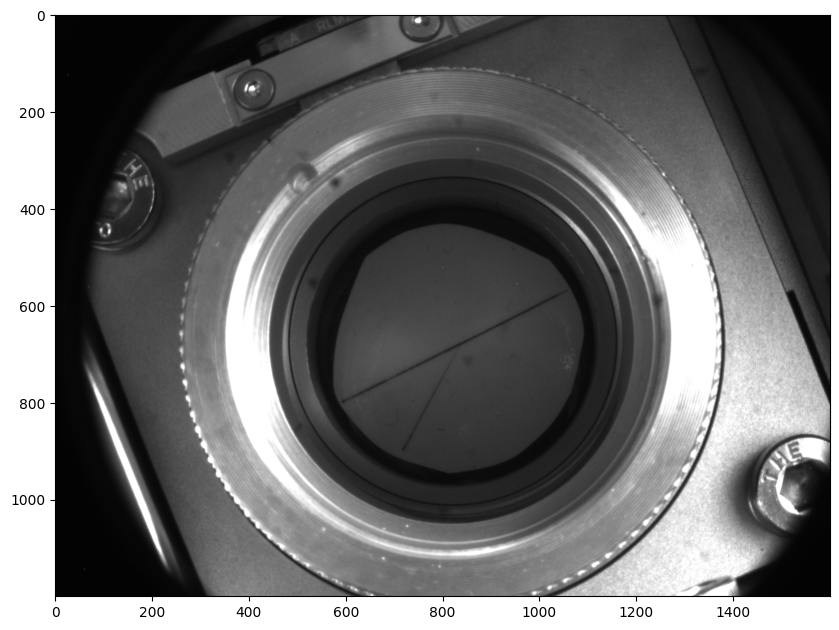

In [2]:
image_rgb = cv2.imread('C:\\Users\\Jason.Bane\\Documents\\Nautilus\\DOE_stage\\code_trials\\images\\Image00003.BMP')


H_limit_hard = [450,1095]
V_limit_hard = [425,950]

Vertical_limits = [400,1050]
Horizontal_limits = [400,1200]

image=  image_rgb
image_height_px, image_width_px, _ = image.shape
#gray scale image if needed
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
random_x = 400
random_y = 450

fig, ax = plt.subplots(figsize=(10,8))


ax.imshow(image_rgb)


In [185]:
y = V_limit_hard[0]

In [260]:
def horizontal_edges(image, resolution:int=1, plot=1, verbose=False)->np.ndarray:
    
    if plot >=1:
        fig1, ax1 = plt.subplots(figsize=(10,8))
        ax1.imshow(image_rgb)


    circle_peaks = []
    total = math.floor((V_limit_hard[1]-V_limit_hard[0])/resolution)

    for k,y in enumerate(range(V_limit_hard[0],V_limit_hard[1],resolution)):

        
        full_raw_line = max(gray_image[y,:]) - gray_image[y,:]
        
        line= full_raw_line.copy()
        line[:Horizontal_limits[0]] = full_raw_line[Horizontal_limits[0]]
        line[Horizontal_limits[1]:] = full_raw_line[Horizontal_limits[1]-1]
        line_blurred = line#np.array(cv2.GaussianBlur(line, (5, 5), 0)[:,0])
        
        height = np.mean(line[Horizontal_limits[0]:Horizontal_limits[1]])*1.225
        raw_h = np.mean(full_raw_line[Horizontal_limits[0]:Horizontal_limits[1]])
        # Compute the gradient of the line
        
        # Find peaks in the gradient
        peaks,peak_properties = scipy.signal.find_peaks(line_blurred,width=[1,9],
                                                        prominence=10,
                                                        height=height,
                                                        distance=30)
        # Filter peaks to find pairs that correspond to circle edges
          #take the two extreme peaks as the circle edges
        if len(peaks)>=2:
            peaks=[min(peaks), max(peaks)]


        for peak in peaks:
            if plot==2: 
                fig,ax = plt.subplots(figsize=(10,8))
                ax.plot(full_raw_line)
                ax.plot(line_blurred)
                ax.plot(peak, line_blurred[peak], "x", markersize=10, color='red')
                ax.grid()
                ax.set_title(f"y={y}")
                ax.hlines(height, xmin=0, xmax=image_width_px, colors='g')
                ax.hlines(raw_h, xmin=0, xmax=image_width_px, linestyles="--", colors='b')
            elif plot>2:
                if y%((plot-1)*10)==0:
                    fig,ax = plt.subplots(figsize=(10,8))
                    ax.plot(peak, line_blurred[peak], "x", markersize=10, color='red')
                    ax.plot(full_raw_line)
                    ax.plot(line_blurred)
                    ax.plot(peak, line_blurred[peak], "x", markersize=10, color='red')
                    ax.grid()
                    ax.set_title(f"y={y}")
                    ax.hlines(height, xmin=0, xmax=image_width_px, colors='g')
                    ax.hlines(raw_h, xmin=0, xmax=image_width_px, linestyles="--", colors='b')
            
            
            if plot>=1: 
                ax1.plot(peak, y, "x", color='yellow')
                ax1.hlines(y, xmin=Horizontal_limits[0], xmax=Horizontal_limits[1], colors='r')
            

            circle_peaks.append((peak,y))
        if verbose:
            print(f"{k}/{total}: Found peaks at y={y}:")
            print(peaks)
            for key in peak_properties.keys():
                print(f"{key}: {peak_properties[key]}")
    return np.array(circle_peaks)   

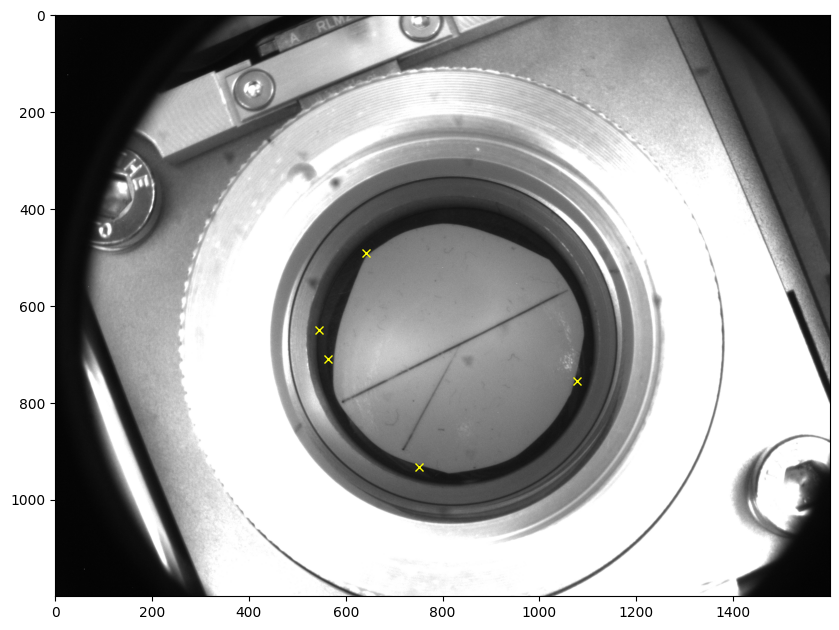

In [187]:
edges= horizontal_edges(image, resolution=1, plot=1, verbose=False)

In [235]:
file_name='C:\\Users\\Jason.Bane\\Documents\\Nautilus\\DOE_stage\\code_trials\\images\\Image00016.BMP'
image_rgb = cv2.imread(file_name)
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

y=V_limit_hard[0]

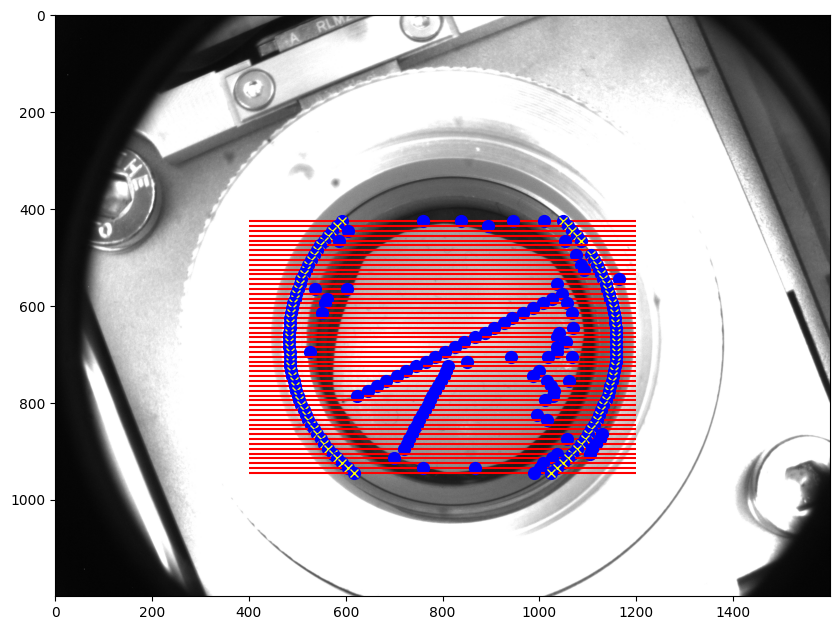

In [ ]:
# just look at horixontal lines, find the the large narrow peak that is the dark cicle edge

plot=1
#verbose=True
verbose=False

if plot >=1:
    fig1, ax1 = plt.subplots(figsize=(10,8))
    ax1.imshow(image_rgb)


circle_peaks = []
y= V_limit_hard[0]
for k,y in enumerate(range(V_limit_hard[0],V_limit_hard[1],10)):
# if 1:
#     y+=20
    if k <0:
        continue
    
    full_raw_line = max(gray_image[y,:]) - gray_image[y,:]
    
    line= full_raw_line.copy()
    line[:Horizontal_limits[0]] = 0
    line[Horizontal_limits[1]:] = 0
    line_blurred = line # np.array(cv2.GaussianBlur(line, (5, 5), 0)[:,0])
    


    
    height = np.mean(line[Horizontal_limits[0]:Horizontal_limits[1]])*1.225
    raw_h = np.mean(full_raw_line[Horizontal_limits[0]:Horizontal_limits[1]])

    if plot>1:
        fig,ax = plt.subplots(figsize=(10,8))
        
        ax.plot(full_raw_line)
        ax.plot(line_blurred, label='y='+str(y))
        
        ax.hlines(height, xmin=0, xmax=image_width_px, colors='g')
        ax.hlines(raw_h, xmin=0, xmax=image_width_px, linestyles="--", colors='b')
        ax.grid()
        ax.legend()


    peaks,peak_properties = scipy.signal.find_peaks(line_blurred,width=[1,9.3],
                                                     prominence=12.5,height=height,
                                                     distance=40)
    # Filter peaks to find pairs that correspond to circle edges

    all_peaks,all_peak_properties = scipy.signal.find_peaks(line_blurred,
                                                            width=[1,20],
                                                            prominence=10,height=height,
                                                            distance=30)

 
    #take the two extreme peaks as the circle edges
    if len(peaks)>=2:
        peaks=[min(peaks), max(peaks)]

    if plot >=1:
        ax1.hlines(y, xmin=Horizontal_limits[0], xmax=Horizontal_limits[1], colors='r')
        ax1.plot(all_peaks, [y]*len(all_peaks), "o", markersize=8.5, color='blue')


    if plot>1:
        ax.plot(all_peaks, line_blurred[all_peaks], "o", markersize=5.5, color='blue') 

        ax.plot(peaks, line_blurred[peaks], "x", markersize=10, color='red')

    if plot>1:
        for i, peak in enumerate(all_peaks):
            prom = all_peak_properties['prominences'][i]
            wid = all_peak_properties['widths'][i]

            ax.hlines(height - prom, xmin=peak - wid/2, xmax=peak + wid/2, colors='m')
            ax.vlines(peak, ymin=line_blurred[peak]-prom, ymax=line_blurred[peak], colors='r')

            
        # if plot>=1:
        #     ax1.plot(peak, y, "x", color='yellow')
        
    if verbose:
        print(f"\n\n Count {k}: Found peaks at y={y}:")
        print(peaks)
        for key in peak_properties.keys():
            print(f"{key}: {peak_properties[key]}")
        print(all_peaks)
        for key in all_peak_properties.keys():
            print(f"{key}: {all_peak_properties[key]}")

    for peak in peaks:
        if plot>=1:
            ax1.plot(peak, y, "x", color='yellow')
        circle_peaks.append((peak,y))


    if k >=130:

        break

    #break




In [152]:
print(circle_peaks)

[(np.int64(593), 425), (np.int64(1048), 425), (np.int64(548), 475), (np.int64(1092), 475), (np.int64(518), 525), (np.int64(1123), 525), (np.int64(497), 575), (np.int64(1143), 575), (np.int64(486), 625), (np.int64(1155), 625), (np.int64(483), 675), (np.int64(1158), 675), (np.int64(486), 725), (np.int64(1155), 725), (np.int64(498), 775), (np.int64(1144), 775), (np.int64(518), 825), (np.int64(1123), 825), (np.int64(549), 875), (np.int64(1092), 875), (np.int64(1047), 925)]


RANSAC found 15 inliers and 89 outliers.
Circle center: (821.19, 677.98)
Circle radius: 337.44 +/- 0.45
residual: 2.98


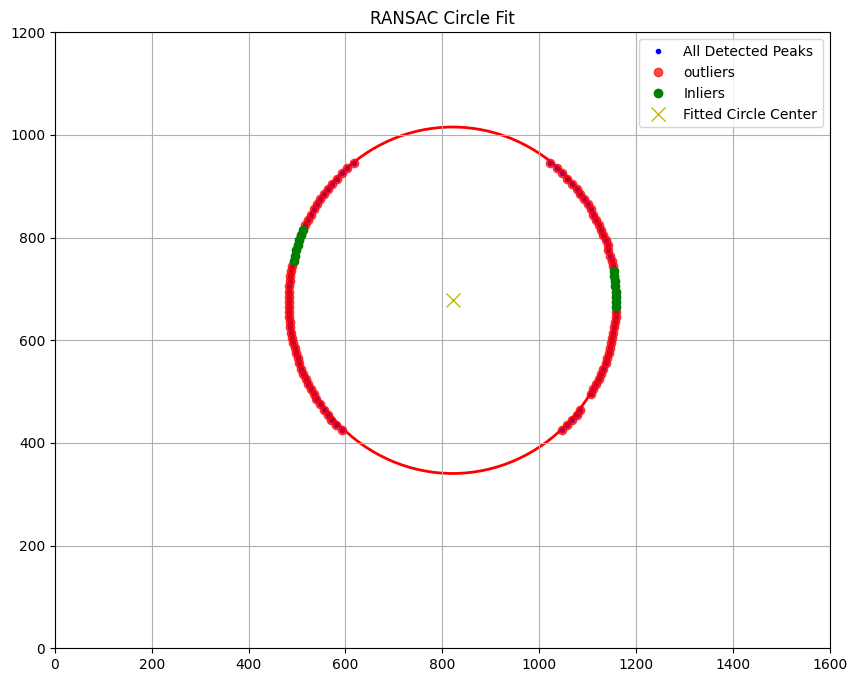

In [237]:
# find the best fit circle to the points, some points are bad, use RANSAC to filter out the bad points


circle_peaks = np.array(circle_peaks)

fig,ax = plt.subplots(figsize=(10,8))
ax.plot(circle_peaks[:,0], circle_peaks[:,1], 'b.', label='All Detected Peaks')

X = circle_peaks[:,0].reshape(-1,1)
Y = circle_peaks[:,1].reshape(-1,1)
data = np.hstack((X,Y))


ransac = RANSACRegressor(min_samples=int(len(circle_peaks)*0.29), 
                         residual_threshold=35, max_trials=3000)
ransac.fit(X, Y) # fit the model
inlier_mask = ransac.inlier_mask_  # get the inlier mask
outlier_mask = np.logical_not(inlier_mask)  
inlier_points = data[inlier_mask]
outlier_points = data[outlier_mask]

print(f"RANSAC found {len(inlier_points)} inliers and {len(outlier_points)} outliers.")

ax.plot(outlier_points[:,0], outlier_points[:,1], 'ro', label='outliers',alpha=0.7)
ax.plot(inlier_points[:,0], inlier_points[:,1], 'go', label='Inliers')


# fit a circle to the inlier points
def calc_R(xc, yc):
    """ calculate the distance of each 2D points from the center (xc, yc) """
    return np.sqrt((inlier_points[:,0]-xc)**2 + (inlier_points[:,1]-yc)**2) 

def f_2(c):
    """ calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) """
    Ri = calc_R(*c)
    residuals = Ri - Ri.mean()
    return np.sum(residuals**2)  # Return sum of squared residuals (scalar)

center_estimate = np.mean(inlier_points, axis=0)
center_2 = minimize(f_2, center_estimate).x
xc_2, yc_2 = center_2
Ri_2       = calc_R(xc_2, yc_2)         
R_2        = Ri_2.mean()
res_2      = np.sum((Ri_2 - R_2)**2)        
print(f"Circle center: ({xc_2:.2f}, {yc_2:.2f})")
print(f"Circle radius: {R_2:.2f} +/- {np.std(Ri_2):.2f}")
print(f"residual: {res_2:.2f}") 

ax.plot(xc_2, yc_2, 'yx', markersize=10, label='Fitted Circle Center')


circle = plt.Circle((xc_2, yc_2), R_2, color='r', fill=False, linewidth=2)
ax.add_patch(circle)   

ax.set_xlim(0, image_width_px)
ax.set_ylim(0, image_height_px)        
ax.set_title('RANSAC Circle Fit')
#ax.set_aspect('equal', adjustable='box')
ax.grid()
plt.legend()
plt.show()

In [277]:
def Center_Radius(peaks, plot=True, verbose=True):
    # fit a circle to the inlier points
    def calc_R(xc, yc):
        """ calculate the distance of each 2D points from the center (xc, yc) """
        return np.sqrt((inlier_points[:,0]-xc)**2 + (inlier_points[:,1]-yc)**2) 

    def f_2(c):
        """ calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) """
        Ri = calc_R(*c)
        residuals = Ri - Ri.mean()
        return np.sum(residuals**2)  # Return sum of squared residuals (scalar)

    # find the best fit circle to the points, some points are bad, use RANSAC to filter out the bad points
    #reformat the data
    circle_peaks = np.array(peaks)
    X = circle_peaks[:,0].reshape(-1,1)
    Y = circle_peaks[:,1].reshape(-1,1)
    data = np.hstack((X,Y))
    ransac = RANSACRegressor(min_samples=int(len(data)*0.30), 
                            residual_threshold=20, max_trials=3000)
    ransac.fit(X, Y) # fit the model
    inlier_mask = ransac.inlier_mask_  # get the inlier mask
    outlier_mask = np.logical_not(inlier_mask)  
    inlier_points = data[inlier_mask]
    outlier_points = data[outlier_mask]
    center_estimate = np.mean(inlier_points, axis=0)
    center_2 = minimize(f_2, center_estimate).x
    xc_2, yc_2 = center_2
    Ri_2       = calc_R(xc_2, yc_2)         
    R_2        = Ri_2.mean()
    res_2      = np.sum((Ri_2 - R_2)**2)        


    if verbose:
        print(f"Total points: {len(circle_peaks)}")
        print(f"RANSAC found {len(inlier_points)} inliers and {len(outlier_points)} outliers.")
        print(f"Circle center: ({xc_2:.2f}, {yc_2:.2f})")
        print(f"Circle radius: {R_2:.2f} +/- {np.std(Ri_2):.2f}")
        print(f"residual: {res_2:.2f}") 

    
    if plot:
        fig,ax = plt.subplots(figsize=(10,8))
        ax.plot(circle_peaks[:,0], circle_peaks[:,1], 'b.', label='All Detected Peaks')
        ax.plot(outlier_points[:,0], outlier_points[:,1], 'ro', label='outliers',alpha=0.7)
        ax.plot(inlier_points[:,0], inlier_points[:,1], 'go', label='Inliers')
        ax.plot(xc_2, yc_2, 'yx', markersize=10, label='Fitted Circle Center')


        circle = plt.Circle((xc_2, yc_2), R_2, color='r', fill=False, linewidth=2)
        ax.add_patch(circle)  
        ax.set_title('RANSAC Circle Fit')
        #ax.set_aspect('equal', adjustable='box')
        ax.grid()
        plt.legend()

    return (xc_2, yc_2, R_2, np.std(Ri_2), res_2)

(np.float64(-9445.69134821448),
 np.float64(-64487.37987117051),
 np.float64(66055.80079757106),
 np.float64(34.340454107282845),
 np.float64(14151.20145953279))

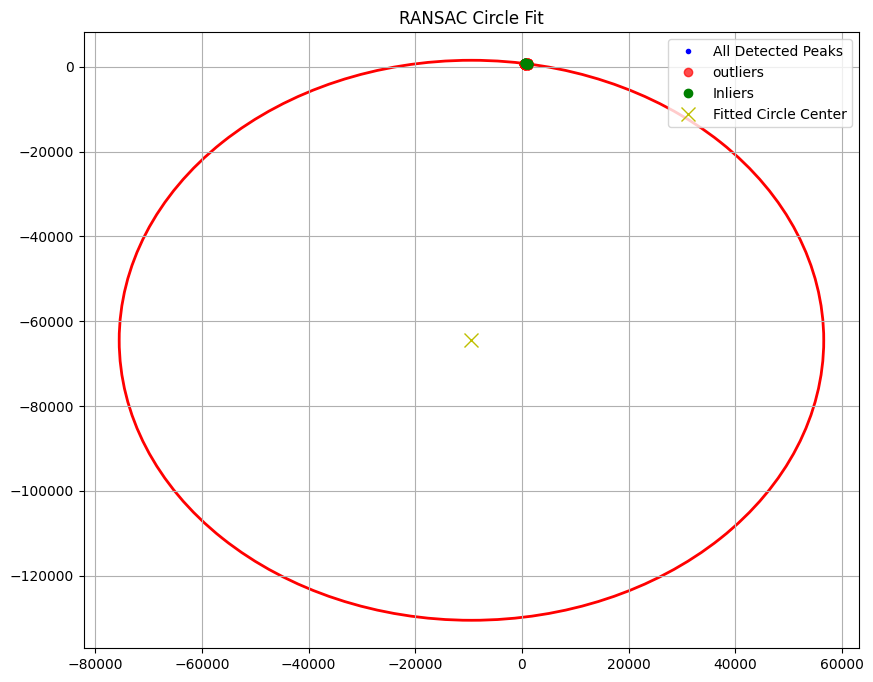

In [42]:
Center_Radius(circle_peaks, plot=True, verbose=False)

Total points: 19
RANSAC found 4 inliers and 15 outliers.
Circle center: (817.75, 670.93)
Circle radius: 342.31 +/- 0.27
residual: 0.29


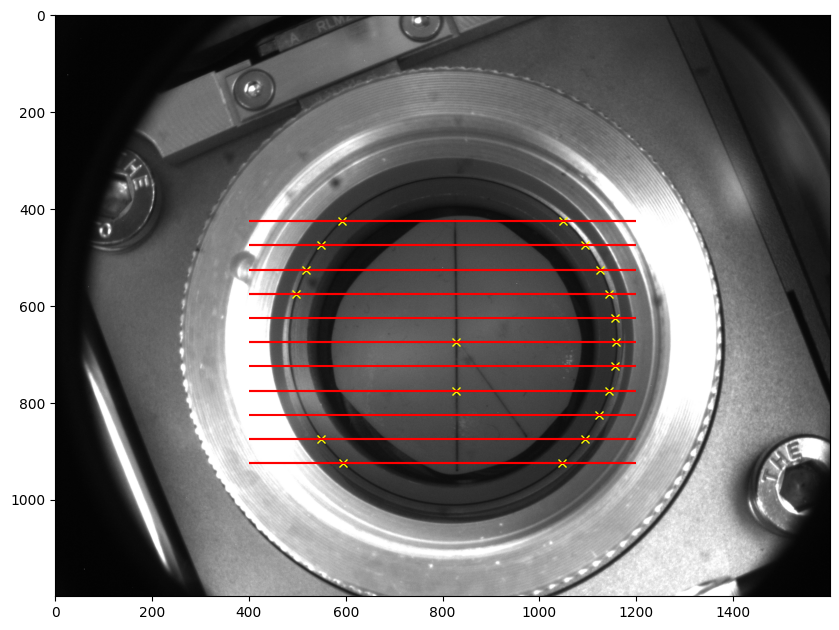

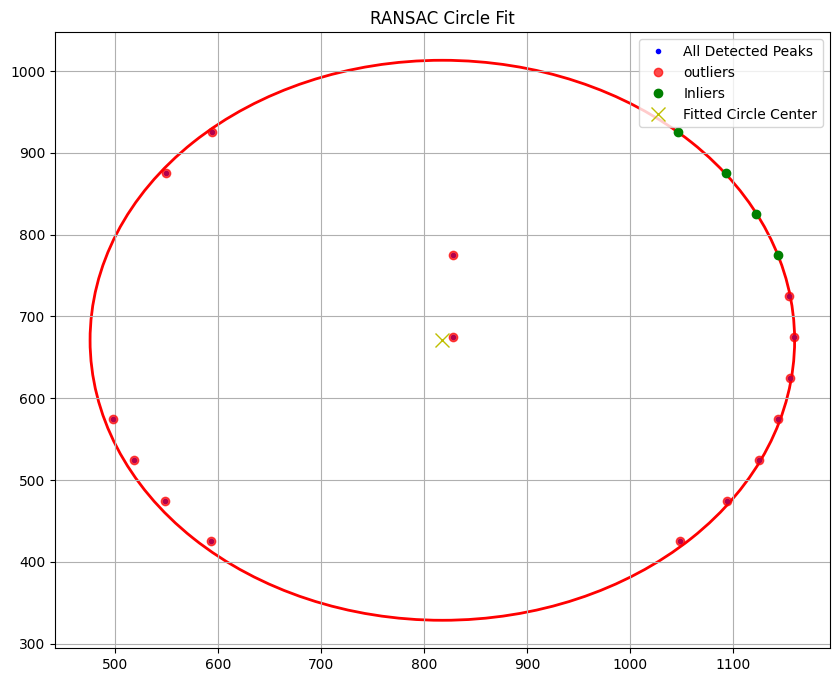

In [278]:
#image = cv2.imread('C:\\Users\\Jason.Bane\\Documents\Nautilus\\DOE_stage\\code_trials\\images\\Image00003.BMP')

image_rgb = cv2.imread('C:\\Users\\Jason.Bane\\Documents\\Nautilus\\DOE_stage\\code_trials\\images\\Image00023.BMP')
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)



edges= horizontal_edges(image_rgb, resolution=50, plot=1, verbose=False)
if len(edges)>3: 
    center_info =Center_Radius(edges, plot=True, verbose=True)

Total points: 19
RANSAC found 4 inliers and 15 outliers.
Circle center: (817.75, 670.93)
Circle radius: 342.31 +/- 0.27
residual: 0.29


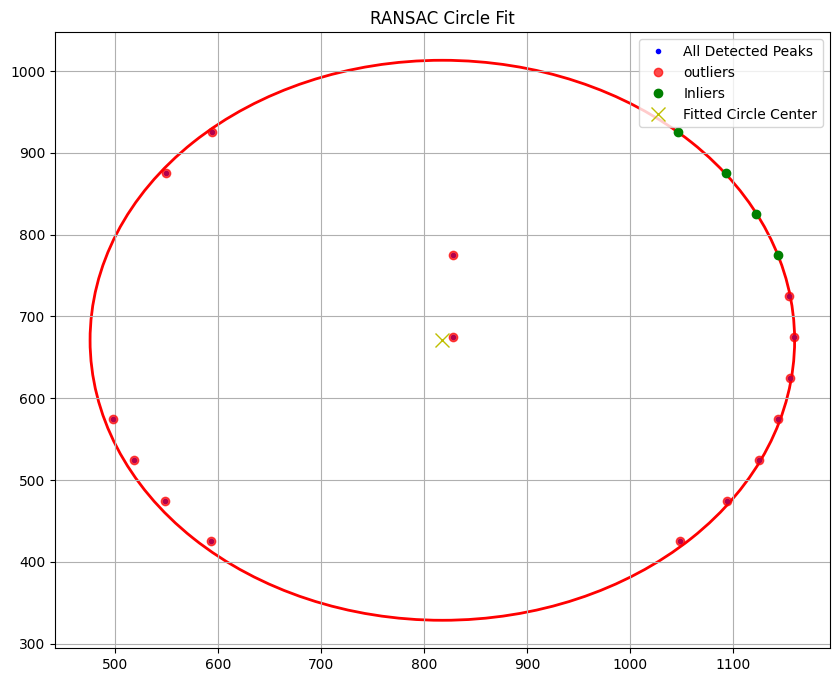

In [299]:
center_info =Center_Radius(edges, plot=True, verbose=True)

In [311]:
def Center_Radius_iterations(peaks, max_iterations=10, threshold=0.02, plot=True, verbose=True):

    # --- Circle fit helper functions ---
    def algebraic_circle_fit(x, y):
        """Fit circle to points using algebraic least squares."""
        D = np.column_stack([x, y, np.ones_like(x)])
        b = -(x**2 + y**2)
        sol, *_ = np.linalg.lstsq(D, b, rcond=None)
        A, B, C = sol
        cx = -A / 2
        cy = -B / 2
        r = np.sqrt(cx**2 + cy**2 - C)
        return cx, cy, r

    def fit_and_residuals(pts):
        """Fit a circle and return center, radius, and residuals for each point."""
        x, y = pts[:,0], pts[:,1]
        cx, cy, r = algebraic_circle_fit(x, y)
        dists = np.sqrt((x - cx)**2 + (y - cy)**2)
        res = dists - r
        return cx, cy, r, res

    # --- Iterative outlier removal ---
    remaining = edges.copy()
    removed = []
    prev_len = None
    iteration = 0

    while True:
        iteration += 1
        cx, cy, r, res = fit_and_residuals(remaining)
        rms = np.sqrt(np.mean(res**2))

        # Median & MAD (robust statistics)
        med = np.median(res)
        mad = np.median(np.abs(res - med))
        sigma_est = 1.4826 * mad if mad > 0 else np.std(res)

        # Outlier threshold
        thresh = max(2.5 * sigma_est, 0.02 * r)
        outlier_mask = np.abs(res - med) > thresh

        if outlier_mask.sum() == 0:
            break

        removed.extend(remaining[outlier_mask].tolist())
        remaining = remaining[~outlier_mask]

        if prev_len == len(remaining) or len(remaining) < 4 or iteration > max_iterations:
            break
        prev_len = len(remaining)

    # --- Final fit on cleaned data ---
    final_cx, final_cy, final_r, final_res = fit_and_residuals(remaining)
    final_rms = np.sqrt(np.mean(final_res**2))
    if verbose:
        print("Final fit:")
        print(f" Center: ({final_cx:.6f}, {final_cy:.6f})")
        print(f" Radius: {final_r:.6f}")
        print(f" RMS residual: {final_rms:.6f}")
        print(f" Points kept: {len(remaining)}, removed: {len(removed)}")

    if removed:
        rem_arr = np.array(removed)

    if plot:
        # --- Plot result ---
        fig, ax = plt.subplots(figsize=(6,6))
        ax.scatter(remaining[:,0], remaining[:,1], label='kept points')
        if removed:
            ax.scatter(rem_arr[:,0], rem_arr[:,1], c='red', marker='x', label='removed points')

        theta = np.linspace(0, 2*np.pi, 400)
        ax.plot(final_cx + final_r*np.cos(theta), final_cy + final_r*np.sin(theta), 'k-')
        ax.set_aspect('equal', adjustable='box')
        ax.set_title('Final circle fit with outlier removal')
        ax.legend()
        ax.grid()
        plt.show()


    return final_cx, final_cy, final_r, final_rms, remaining, removed

In [313]:
Cx,Cy,R,RMS,Remaing,Removed =Center_Radius_iterations(edges, max_iterations=10, threshold=0.02, plot=False, verbose=False)